In [1]:
import gym
import rl_agents
import pprint
from rl_agents.agents.common.factory import load_agent, load_environment
from rl_agents.trainer.evaluation import Evaluation
from matplotlib import pyplot as plt

env_config = 'rl-agents/scripts/configs/HighwayEnv/env.json'
agent_config = 'rl-agents/scripts/configs/HighwayEnv/agents/DQNAgent/dqn.json'

env = load_environment(env_config)
env.configure({"offscreen_rendering": True})

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/99klhe01/Library/Python/3.9/lib/python/site-packages/gym/utils/passive_env_checker.py:31: UserWarning: WARN: A Box observation space has an unconventional shape (neither an image, nor a 1D vector). We recommend flattening the observation to have only a 1D vector or use a custom policy to properly process the data. Actual observation shape: (5, 5)
  logger.warn(


# Test 1 - No vehicles, no change lane reward, 2 lanes.

I observed that the vehicle favored switching to the right lane and staying there. This makes sense as it does receive a small reward (0.1) for being in the right lane.

In [10]:
env.config["lane_change_reward"] = 0
env.config["vehicles_count"] = 0
env.config["lanes_count"] = 2
env.config["initial_lane_id"] = 0

# Test 2 - 3 vehicles, no change lane reward, 5 lanes
I observed similar behavior to the previous config. The car wanted to stay in the rightmost lane, but it has also learned to avoid collisions with other cars.

In [2]:
env.config["lane_change_reward"] = 0
env.config["vehicles_count"] = 3
env.config["lanes_count"] = 5
env.config["initial_lane_id"] = 0

# Test 3 - 3 vechicles, -0.1 change lane reward, 5 lanes
I now observe that the car sometimes prefer to actually stay behind a car rather than to switch lanes. Although, this does not happen all the time. It can still take the penalty and turn to the rightmost lane. This makes sense as it only receives a -0.1*5 = -0.5 total reward for turning to the rightmost lane, where it receives a 0.1 reward each simulation tick, so it is worth it to change to it early.

In [2]:
env.config["lane_change_reward"] = -0.1
env.config["vehicles_count"] = 3
env.config["lanes_count"] = 5
env.config["initial_lane_id"] = 0

# Test 4 - 3 vehicles, -1 change lane reward, 5 lanes, 
The car now oscillates between lanes. I would guess that it is due to after it switching lanes it receives a large negative reward, so it wants to get back to the previous lane, but then it receives another negative reward, causing it to get back again, and so on... Intereseting that it does not learn to stop switching lanes. It may be due to training for too few episodes.

In [2]:
env.config["lane_change_reward"] = -1
env.config["vehicles_count"] = 3
env.config["lanes_count"] = 5
env.config["initial_lane_id"] = 0

# Test 5 - 3 vechicles, -10 change lane reward, 5 lanes.

In [2]:
env.config["lane_change_reward"] = -10
env.config["vehicles_count"] = 3
env.config["lanes_count"] = 5
env.config["initial_lane_id"] = 0

{'action': {'type': 'DiscreteMetaAction'},
 'centering_position': [0.3, 0.5],
 'collision_reward': -1,
 'controlled_vehicles': 1,
 'duration': 40,
 'ego_spacing': 2,
 'high_speed_reward': 0.4,
 'id': 'highway-v0',
 'import_module': 'highway_env',
 'initial_lane_id': 0,
 'lane_change_reward': -10,
 'lanes_count': 5,
 'manual_control': False,
 'normalize_reward': True,
 'observation': {'type': 'Kinematics'},
 'offroad_terminal': False,
 'offscreen_rendering': True,
 'other_vehicles_type': 'highway_env.vehicle.behavior.IDMVehicle',
 'policy_frequency': 1,
 'real_time_rendering': False,
 'render_agent': True,
 'reward_speed_range': [20, 30],
 'right_lane_reward': 0.1,
 'scaling': 5.5,
 'screen_height': 150,
 'screen_width': 600,
 'show_trajectories': False,
 'simulation_frequency': 15,
 'vehicles_count': 3,
 'vehicles_density': 1}
'rl-agents/scripts/configs/HighwayEnv/agents/DQNAgent/dqn.json'


/Users/99klhe01/Library/Python/3.9/lib/python/site-packages/gym/utils/passive_env_checker.py:289: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(


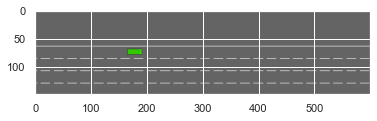

Preferred device cuda:best unavailable, switching to default cpu


In [3]:
pprint.pprint(env.config)
pprint.pprint(agent_config)
env.reset()

plt.imshow(env.render(mode="rgb_array"))
plt.show()

agent = load_agent(agent_config, env)
evaluation = Evaluation(env, agent, num_episodes=800, display_env=False, display_agent=False)

In [4]:
evaluation.train()

/Users/99klhe01/Library/Python/3.9/lib/python/site-packages/rl_agents/agents/deep_q_network/pytorch.py:80: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/torch/csrc/utils/tensor_new.cpp:233.)
  return self.value_net(torch.tensor(states, dtype=torch.float).to(self.device)).data.cpu().numpy()
[INFO] Episode 0 score: 22.7 
[INFO] Saved DQNAgent model to out/HighwayEnv/DQNAgent/run_20221230-132526_69831/checkpoint-0.tar 
[INFO] Episode 1 score: 11.4 
[INFO] Saved DQNAgent model to out/HighwayEnv/DQNAgent/run_20221230-132526_69831/checkpoint-1.tar 
[INFO] Episode 2 score: 31.3 
[INFO] Episode 3 score: 2.7 
[INFO] Episode 4 score: 1.6 
[INFO] Episode 5 score: 24.2 
[INFO] Episode 6 score: 31.6 
[INFO] Episode 7 score: 32.3 
[INFO] Episode 8 score: 6.6 
[INFO] Saved DQNAgent model to

In [5]:
env.configure({"offscreen_rendering": True})
env.render(mode="rgb_array")
evaluation = Evaluation(env, agent, num_episodes=10, recover=True)
evaluation.test()

[INFO] Loaded DQNAgent model from out/HighwayEnv/DQNAgent/saved_models/latest.tar 
INFO: Starting new video recorder writing to /Users/99klhe01/Documents/highway-env/scripts/out/HighwayEnv/DQNAgent/run_20221230-134557_69831/rl-video-episode-0.mp4


Moviepy - Building video /Users/99klhe01/Documents/highway-env/scripts/out/HighwayEnv/DQNAgent/run_20221230-134557_69831/rl-video-episode-0.mp4.
Moviepy - Writing video /Users/99klhe01/Documents/highway-env/scripts/out/HighwayEnv/DQNAgent/run_20221230-134557_69831/rl-video-episode-0.mp4



[INFO] Episode 0 score: 35.3                                   
INFO: Starting new video recorder writing to /Users/99klhe01/Documents/highway-env/scripts/out/HighwayEnv/DQNAgent/run_20221230-134557_69831/rl-video-episode-1.mp4


Moviepy - Done !
Moviepy - video ready /Users/99klhe01/Documents/highway-env/scripts/out/HighwayEnv/DQNAgent/run_20221230-134557_69831/rl-video-episode-0.mp4
Moviepy - Building video /Users/99klhe01/Documents/highway-env/scripts/out/HighwayEnv/DQNAgent/run_20221230-134557_69831/rl-video-episode-1.mp4.
Moviepy - Writing video /Users/99klhe01/Documents/highway-env/scripts/out/HighwayEnv/DQNAgent/run_20221230-134557_69831/rl-video-episode-1.mp4



[INFO] Episode 1 score: 39.1                                   


Moviepy - Done !
Moviepy - video ready /Users/99klhe01/Documents/highway-env/scripts/out/HighwayEnv/DQNAgent/run_20221230-134557_69831/rl-video-episode-1.mp4


[INFO] Episode 2 score: 5.5 


In [ ]:
%tensorboard --logdir "{evaluation.directory}"